In [1]:
import pandas as pd
import numpy as np

In [2]:
samp=np.random.randint(100, 600,size=(4,5))

In [3]:
df22=pd.DataFrame(samp)

In [4]:
samp

array([[509, 568, 331, 476, 568],
       [456, 315, 314, 256, 524],
       [257, 347, 403, 211, 474],
       [109, 552, 489, 585, 517]])

In [5]:
df22


,0,1,2,3,4
0,509,568,331,476,568
1,456,315,314,256,524
2,257,347,403,211,474
3,109,552,489,585,517


In [6]:
df=pd.DataFrame(samp,index=['avi','dani','rina','dina'], 
                        columns=['Jan','Feb','Mar','Apr','May'])

In [7]:
df2=pd.DataFrame(samp,index=['eli','yosi','rani','meir'], 
                        columns=['Jan','Feb','Mar','Apr','May'])

In [8]:
df

,Jan,Feb,Mar,Apr,May
avi,152,333,312,312,411
dani,438,459,186,597,388
rina,286,109,109,278,580
dina,404,239,473,123,492


In [9]:
df['Jan']


avi     152
dani    438
rina    286
dina    404
Name: Jan, dtype: int64

In [10]:
df['Jan']['avi']

152

In [11]:
df

,Jan,Feb,Mar,Apr,May
avi,152,333,312,312,411
dani,438,459,186,597,388
rina,286,109,109,278,580
dina,404,239,473,123,492


In [12]:
df.loc['avi':'rina':2,'Jan':'Apr':2] 

,Jan,Mar
avi,152,312
rina,286,109


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [13]:
# Pass a list of column names
df[['Jan','May']]

,Jan,May
avi,152,411
dani,438,388
rina,286,580
dina,404,492


In [14]:
df['Jan']['avi']


152

In [15]:
df.Feb.avi

333

In [16]:
df.Feb[df.Feb>300]

avi     333
dani    459
Name: Feb, dtype: int64

DataFrame Columns are just Series

In [17]:
type(df['May'])

pandas.core.series.Series

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
type(df['May']>300)

pandas.core.series.Series

In [20]:
type(df['May']['avi'])

numpy.int64

### More options

In [21]:
df['Jan']['rina'] = 300
df['Jan']['avi'] = 300

In [22]:
df

,Jan,Feb,Mar,Apr,May
avi,300,333,312,312,411
dani,438,459,186,597,388
rina,300,109,109,278,580
dina,404,239,473,123,492


In [23]:
df['Jan'].unique()

array([300, 438, 404])

In [24]:
df['Jan'].nunique()

3

In [25]:
df['Jan'].value_counts()

300    2
404    1
438    1
Name: Jan, dtype: int64

In [26]:
df['Jan'][1:3]

dani    438
rina    300
Name: Jan, dtype: int64

In [27]:
df.loc['dani':,'Feb':'Apr']

,Feb,Mar,Apr
dani,459,186,597
rina,109,109,278
dina,239,473,123


In [28]:
df

,Jan,Feb,Mar,Apr,May
avi,300,333,312,312,411
dani,438,459,186,597,388
rina,300,109,109,278,580
dina,404,239,473,123,492


In [29]:
df.iloc[:3]

,Jan,Feb,Mar,Apr,May
avi,300,333,312,312,411
dani,438,459,186,597,388
rina,300,109,109,278,580


In [30]:
df.iloc[[1,3],[2,3]]

,Mar,Apr
dani,186,597
dina,473,123


In [31]:
df.loc[lambda df:df['Jan']>200,:]

,Jan,Feb,Mar,Apr,May
avi,300,333,312,312,411
dani,438,459,186,597,388
rina,300,109,109,278,580
dina,404,239,473,123,492


In [32]:
df.loc[:,lambda df: ['Jan','Mar']]

,Jan,Mar
avi,300,312
dani,438,186
rina,300,109
dina,404,473


In [35]:
def add_bonus(x):
    return x*1.2
df.apply(add_bonus)

,Jan,Feb,Mar,Apr,May
avi,360.0,399.6,374.4,374.4,493.2
dani,525.6,550.8,223.2,716.4,465.6
rina,360.0,130.8,130.8,333.6,696.0
dina,484.8,286.8,567.6,147.6,590.4


In [40]:
df['Jan'].apply(lambda x:x+1000)

avi     2300
dani    2438
rina    2300
dina    2404
Name: Jan, dtype: int64

In [41]:
df['Jan'].sum()

1275L

### Creating a new column:

In [140]:
df['Expected'] = df['May'] + 20

In [39]:
df

,Jan,Feb,Mar,Apr,May
avi,1300,333,312,312,411
dani,1438,459,186,597,388
rina,1300,109,109,278,580
dina,1404,239,473,123,492


In [160]:
df.loc['eli'] = [100,200,300,400,500,600]

In [161]:
df

,Jan,Feb,Mar,Apr,May,Expected
avi,500,558,140,589,560,580
dani,177,336,405,267,277,297
rina,506,168,269,161,217,237
dina,237,571,138,598,273,293
eli,100,200,300,400,500,600


### Removing Columns

In [38]:
df.drop('rina',axis=0)

,Jan,Feb,Mar,Apr,May,Expected
avi,205,225,129,549,328,348
dani,150,348,325,474,268,288
dina,407,158,478,120,575,595


In [39]:
# Not inplace unless specified!
df

,Jan,Feb,Mar,Apr,May,Expected
avi,205,225,129,549,328,348
dani,150,348,325,474,268,288
rina,495,348,488,579,371,391
dina,407,158,478,120,575,595


In [40]:
df.drop('Apr',axis=1,inplace=True)

In [41]:
df

,Jan,Feb,Mar,May,Expected
avi,205,225,129,328,348
dani,150,348,325,268,288
rina,495,348,488,371,391
dina,407,158,478,575,595


** Selecting Rows**

In [43]:
df.loc['avi']

Jan         205
Feb         225
Mar         129
May         328
Expected    348
Name: avi, dtype: int64

Or select based off of position instead of label 

In [44]:
df.iloc[2]

Jan         495
Feb         348
Mar         488
May         371
Expected    391
Name: rina, dtype: int64

** Selecting subset of rows and columns **

In [45]:
df.loc['avi','Jan']

205

In [46]:
df.loc[['avi','rina'],['Feb','Apr']]

,Feb,Apr
avi,225.0,NaN
rina,348.0,NaN


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [165]:
df

,Jan,Feb,Mar,Apr,May,Expected
avi,500,558,140,589,560,580
dani,177,336,405,267,277,297
rina,506,168,269,161,217,237
dina,237,571,138,598,273,293
eli,100,200,300,400,500,600


In [48]:
df>200

,Jan,Feb,Mar,May,Expected
avi,True,True,False,True,True
dani,False,True,True,True,True
rina,True,True,True,True,True
dina,True,False,True,True,True


In [49]:
df[df>200]

,Jan,Feb,Mar,May,Expected
avi,205.0,225.0,NaN,328,348
dani,NaN,348.0,325.0,268,288
rina,495.0,348.0,488.0,371,391
dina,407.0,NaN,478.0,575,595


In [50]:
df[df['Jan']>200]

,Jan,Feb,Mar,May,Expected
avi,205,225,129,328,348
rina,495,348,488,371,391
dina,407,158,478,575,595


In [54]:
df[df['Jan']>200]['May']

avi     328
rina    371
dina    575
Name: May, dtype: int64

In [56]:
df[df['Jan']>200][['Jan','Mar']]

,Jan,Mar
avi,205,129
rina,495,488
dina,407,478


For two conditions you can use | and & with parenthesis:

In [57]:
df[(df['Jan']>200) & (df['Feb'] > 300)]

,Jan,Feb,Mar,May,Expected
rina,495,348,488,371,391


### sorting

In [42]:
df

,Jan,Feb,Mar,Apr,May
avi,300,455,367,207,440
dani,276,169,213,561,510
rina,300,423,533,411,314
dina,399,257,592,356,215


In [43]:
df.sort_values('Jan')

,Jan,Feb,Mar,Apr,May
dani,276,169,213,561,510
avi,300,455,367,207,440
rina,300,423,533,411,314
dina,399,257,592,356,215


In [41]:
df['Jan']['avi'] = np.nan
df['Feb']['dani'] = np.nan
df

/Users/liran/Dropbox/work/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/liran/Dropbox/work/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Jan,Feb,Mar,Apr,May
avi,NaN,333.0,312,312,411
dani,1438.0,NaN,186,597,388
rina,1300.0,109.0,109,278,580
dina,1404.0,239.0,473,123,492


In [42]:
df.isnull()

,Jan,Feb,Mar,Apr,May
avi,True,False,False,False,False
dani,False,True,False,False,False
rina,False,False,False,False,False
dina,False,False,False,False,False


In [43]:
df.dropna()

,Jan,Feb,Mar,Apr,May
rina,1300.0,109.0,109,278,580
dina,1404.0,239.0,473,123,492


In [84]:
df.dropna()

,Jan,Feb,Mar,Apr,May
rina,595.0,538.0,473,477,535
dina,118.0,398.0,461,199,125


In [71]:
df.fillna(1000)

,Jan,Feb,Mar,Apr,May
avi,1000.0,99.0,99,99,99
dani,276.0,1000.0,295,377,156
rina,595.0,538.0,473,477,535
dina,118.0,398.0,461,199,125


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [117]:
df

,Jan,Feb,Mar,Apr,May
avi,431,130,219,374,577
dani,507,438,550,529,508
rina,281,262,543,351,434
dina,130,486,135,174,138


In [45]:
# Reset to default 0,1...n index
df.reset_index()

,index,Jan,Feb,Mar,Apr,May
0,avi,NaN,333.0,312,312,411
1,dani,1438.0,NaN,186,597,388
2,rina,1300.0,109.0,109,278,580
3,dina,1404.0,239.0,473,123,492


In [46]:
newind = 'CA NY WY CL'.split()

In [47]:
newind

['CA', 'NY', 'WY', 'CL']

In [48]:
df['States'] = newind

In [49]:
df

,Jan,Feb,Mar,Apr,May,States
avi,NaN,333.0,312,312,411,CA
dani,1438.0,NaN,186,597,388,NY
rina,1300.0,109.0,109,278,580,WY
dina,1404.0,239.0,473,123,492,CL


In [50]:
df.set_index(['States','Jan'])

,,Feb,Mar,Apr,May
States,Jan,,,,
CA,NaN,333.0,312,312,411
NY,1438.0,NaN,186,597,388
WY,1300.0,109.0,109,278,580
CL,1404.0,239.0,473,123,492


In [52]:
df

,Jan,Feb,Mar,Apr,May,States
avi,NaN,333.0,312,312,411,CA
dani,1438.0,NaN,186,597,388,NY
rina,1300.0,109.0,109,278,580,WY
dina,1404.0,239.0,473,123,492,CL


In [53]:
df.set_index('States',inplace=True)

In [54]:
df

,Jan,Feb,Mar,Apr,May
States,,,,,
CA,NaN,333.0,312,312,411
NY,1438.0,NaN,186,597,388
WY,1300.0,109.0,109,278,580
CL,1404.0,239.0,473,123,492


In [56]:
df.loc['CA']

Jan      NaN
Feb    333.0
Mar    312.0
Apr    312.0
May    411.0
Name: CA, dtype: float64

## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [99]:
# Index Levels
years = ['2016','2016','2016','2016','2017','2017','2017','2017']
q = [1,2,3,4,1,2,3,4]
t = list(zip(years,q))
mi = pd.MultiIndex.from_tuples(t)

In [100]:
mi

MultiIndex(levels=[[u'2016', u'2017'], [1, 2, 3, 4]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]])

In [101]:
df = pd.DataFrame(np.random.randn(8,2),index=mi,columns=['A','B'])
df

A         B
2016 1 -0.521525  1.600902
     2  1.795990 -0.264867
     3  1.056931 -0.179688
     4  0.119919 -1.503701
2017 1 -0.740633  1.046852
     2 -0.504358  0.202166
     3 -0.052899  0.154800
     4  0.957672  1.195012

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [102]:
df.loc['2016']

,A,B
1,-0.521525,1.600902
2,1.795990,-0.264867
3,1.056931,-0.179688
4,0.119919,-1.503701


In [103]:
df.loc['2017'].loc[1]

A   -0.740633
B    1.046852
Name: 1, dtype: float64

In [104]:
df.index.names

FrozenList([None, None])

In [105]:
df.index.names = ['Year','Q']

In [106]:
df

A         B
Year Q                    
2016 1 -0.521525  1.600902
     2  1.795990 -0.264867
     3  1.056931 -0.179688
     4  0.119919 -1.503701
2017 1 -0.740633  1.046852
     2 -0.504358  0.202166
     3 -0.052899  0.154800
     4  0.957672  1.195012

In [107]:
df.xs('2017')

,A,B
Q,,
1,-0.740633,1.046852
2,-0.504358,0.202166
3,-0.052899,0.154800
4,0.957672,1.195012


In [86]:
df.xs(['2016',1])

A    1.266636
B   -0.576670
Name: (2016, 1), dtype: float64

In [88]:
df.xs(1,level='Q')

,A,B
Year,,
2016,1.266636,-0.576670
2017,-1.462987,0.345033


## concat

In [73]:
df2

,Jan,Feb,Mar,Apr,May
eli,213,337,252,273,352
yosi,140,180,513,547,439
rani,127,191,215,547,207
meir,343,376,269,408,179


In [68]:
df

,Jan,Feb,Mar,Apr,May
avi,213,337,252,273,352
dani,140,180,513,547,439
rina,127,191,215,547,207
dina,343,376,269,408,179


In [72]:
pd.concat([df,df2])

,Jan,Feb,Mar,Apr,May
avi,213,337,252,273,352
dani,140,180,513,547,439
rina,127,191,215,547,207
dina,343,376,269,408,179
eli,213,337,252,273,352
yosi,140,180,513,547,439
rani,127,191,215,547,207
meir,343,376,269,408,179


In [74]:
pd.concat([df,df2],axis=1)

,Jan,Feb,Mar,Apr,May,Jan,Feb,Mar,Apr,May
avi,213.0,337.0,252.0,273.0,352.0,NaN,NaN,NaN,NaN,NaN
dani,140.0,180.0,513.0,547.0,439.0,NaN,NaN,NaN,NaN,NaN
dina,343.0,376.0,269.0,408.0,179.0,NaN,NaN,NaN,NaN,NaN
eli,NaN,NaN,NaN,NaN,NaN,213.0,337.0,252.0,273.0,352.0
meir,NaN,NaN,NaN,NaN,NaN,343.0,376.0,269.0,408.0,179.0
rani,NaN,NaN,NaN,NaN,NaN,127.0,191.0,215.0,547.0,207.0
rina,127.0,191.0,215.0,547.0,207.0,NaN,NaN,NaN,NaN,NaN
yosi,NaN,NaN,NaN,NaN,NaN,140.0,180.0,513.0,547.0,439.0


In [86]:
left = pd.DataFrame({'id': [10, 20, 30, 40],
                     'Name': ['avi', 'dani', 'rina', 'dina'],
                     'City': ['haifa', 'aco', 'tel aviv', 'yafo']})
   
right = pd.DataFrame({'id': [10, 20, 30, 50],
                     'Salary': [1000, 2000, 3000, 4000],
                     'Position': ['CTO', 'CEO', 'COO', 'Marketing']}) 

In [87]:
left

,City,Name,id
0,haifa,avi,10
1,aco,dani,20
2,tel aviv,rina,30
3,yafo,dina,40


In [88]:
right

,Position,Salary,id
0,CTO,1000,10
1,CEO,2000,20
2,COO,3000,30
3,Marketing,4000,50


In [89]:
pd.merge(left,right,how='inner',on='id')

,City,Name,id,Position,Salary
0,haifa,avi,10,CTO,1000
1,aco,dani,20,CEO,2000
2,tel aviv,rina,30,COO,3000


In [90]:
pd.merge(left,right,how='left',on='id')

,City,Name,id,Position,Salary
0,haifa,avi,10,CTO,1000.0
1,aco,dani,20,CEO,2000.0
2,tel aviv,rina,30,COO,3000.0
3,yafo,dina,40,NaN,NaN


In [91]:
pd.merge(left,right,how='right',on='id')

,City,Name,id,Position,Salary
0,haifa,avi,10,CTO,1000
1,aco,dani,20,CEO,2000
2,tel aviv,rina,30,COO,3000
3,NaN,NaN,50,Marketing,4000


In [105]:
right

,Position,Salary,id
0,CTO,1000,10
1,CEO,2000,20
2,COO,3000,30
3,Marketing,4000,50


In [135]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],'B': ['B0', 'B1', 'B2']},index=['K0', 'K1', 'K2'])
 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],'D': ['D0', 'D2', 'D3']},index=['K0', 'K2', 'K3'])

result = left.join(right)

In [136]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [137]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [109]:
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [107]:
df3 = pd.DataFrame({'id': [10, 20, 30, 40],
                     'Name': ['avi', 'dani', 'rina', 'dina'],
                     'City': ['haifa', 'haifa', 'tel aviv', 'yafo']})

In [111]:
df3.groupby('City').count()

,Name,id
City,,
haifa,2,2
tel aviv,1,1
yafo,1,1


In [140]:
samp=np.random.randint(100, 600,size=(10,10))

In [141]:
samp

array([[566, 577, 140, 333, 244, 261, 227, 203, 396, 397],
       [487, 541, 326, 385, 309, 392, 203, 436, 274, 558],
       [252, 422, 477, 429, 298, 407, 100, 199, 548, 464],
       [547, 106, 507, 423, 216, 384, 565, 109, 198, 496],
       [160, 291, 264, 219, 351, 276, 143, 291, 206, 176],
       [508, 460, 108, 228, 394, 447, 108, 181, 134, 202],
       [329, 329, 368, 520, 155, 569, 385, 473, 463, 220],
       [159, 542, 225, 594, 568, 234, 185, 489, 302, 464],
       [150, 212, 493, 472, 143, 353, 568, 270, 253, 496],
       [331, 214, 372, 278, 248, 257, 327, 275, 527, 205]])

In [142]:
%matplotlib inline

In [143]:
dh=pd.DataFrame(samp,columns="A,B,C,D,E,F,G,H,I,J".split(','))

In [144]:
dh

,A,B,C,D,E,F,G,H,I,J
0,566,577,140,333,244,261,227,203,396,397
1,487,541,326,385,309,392,203,436,274,558
2,252,422,477,429,298,407,100,199,548,464
3,547,106,507,423,216,384,565,109,198,496
4,160,291,264,219,351,276,143,291,206,176
5,508,460,108,228,394,447,108,181,134,202
6,329,329,368,520,155,569,385,473,463,220
7,159,542,225,594,568,234,185,489,302,464
8,150,212,493,472,143,353,568,270,253,496
9,331,214,372,278,248,257,327,275,527,205


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112b97b50>]], dtype=object)

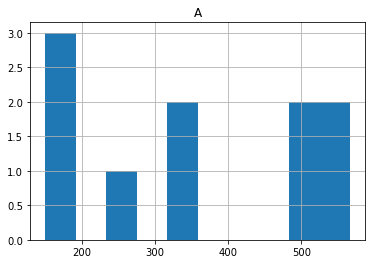

In [145]:
dh.hist('A')

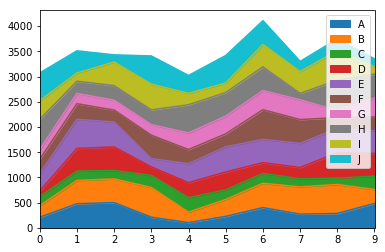

In [135]:
dh.plot.area()

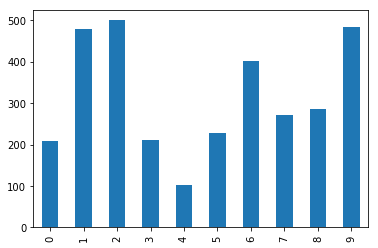

In [139]:
dh['A'].plot.bar()